<a href="https://colab.research.google.com/github/EmiHamada/Sund_Box/blob/master/Augment_tools/training_OBJECT_DETECTION_FINETUNING_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 物体検出トレーニング

[OpenCV公式チュートリアル](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html#py-table-of-content-imgproc)

[公式リファレンス](http://opencv.jp/opencv-2svn/cpp/index.html)

## 初期設定

In [1]:
from google.colab import drive
from pprint import pprint
import os


set_dir = '/content/gdrive'
cwd_dir = '/content/gdrive/My Drive/Colab Notebooks'

def set_share_dir(set_dir, cwd_dir):
  drive.mount(set_dir)
  pprint(os.listdir(cwd_dir))

set_share_dir(set_dir, cwd_dir)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['PyTourch_tutorial_1.ipynb',
 'PyTourch_tutorial_1.ipynb のコピー',
 'PyTourch_tutorial_2.ipynb',
 'PyTourch_tutorial_3.ipynb',
 'PyTourch_tutorial_4.ipynb',
 'PennFudanPed.zip',
 '技術要件.gdoc',
 'Untitled',
 'PennFudanPed.zip (Unzipped Files)',
 'OpenCV_training.ipynb',
 'tv-training-code (1).py',
 'tv-training-code.py',
 'transforms.py',
 'engine.py',
 'utils.py',
 'coco_utils.py',
 'coco_eval.py',
 'torchvision_finetuning_instance_segmentation.ipynb のコピー のコピー',
 'torchvision_finetuning_instance_segmentation.ipynb のコピー',
 'torchvision_finetuning_instance_segmentation.ipynb のコピー のコピー のコピー',
 ' Image_recognition_tutorial_1.ipynb のコピー',
 'img',
 ' Image_recognition_tutorial_1.ipynb',
 'Untitled0.ipynb',
 'training_OBJECT_DETECTION_FINETUNING_2.ipynb',
 'training_OBJECT_DETECTION_FINETUNING_1.ipynb']


In [2]:
# 加工対象画像の設置パス
img_path = os.path.join(cwd_dir,'img')
print(img_path)
os.listdir(img_path)

/content/gdrive/My Drive/Colab Notebooks/img


['human_rash',
 'human_face',
 'cat',
 'facedetect_output.png',
 'facedetect_output_2.png']

In [20]:
!ls './gdrive/My Drive/Colab Notebooks/img/human_face/'

babyFTHG7399_TP_V.jpg	 facedetect_output_5.png  face.jpg
babyFTHG7523_TP_V.jpg	 facedetect_output_6.png  HIROTA17621034_TP_V.jpg
babyFTHG7756_TP_V.jpg	 facedetect_output_7.png  images.jpg
facedetect_output_2.png  facedetect_output_8.png  kuchikomi987_TP_V.jpg
facedetect_output_3.png  facedetect_output_9.png  PAK95_anjyutukamaru_TP_V.jpg
facedetect_output_4.png  facedetect_output.png	  sachin.jpg


In [0]:
! pwd

/content


In [19]:
!ls

facedetect_output_2.png  facedetect_output_6.png  facedetect_output.png
facedetect_output_3.png  facedetect_output_7.png  gdrive
facedetect_output_4.png  facedetect_output_8.png  opencv
facedetect_output_5.png  facedetect_output_9.png  sample_data


In [0]:
!cp *png './gdrive/My Drive/Colab Notebooks/img/human_face/'

In [3]:
# print(os.getcwd())
import glob

kind =  'human_face'

target_path = os.path.join(img_path, kind)

# 対象パス以下のファイル名を全て取得
# パスの存在確認、再帰処理等も必要なら実装する
# 今は取り敢えずファイル名の取得ができれば可


def get_target_filename(path):
  lists = glob.glob(os.path.join(path, '*'))
  return lists

print(get_target_filename(target_path))

['/content/gdrive/My Drive/Colab Notebooks/img/human_face/babyFTHG7399_TP_V.jpg', '/content/gdrive/My Drive/Colab Notebooks/img/human_face/babyFTHG7523_TP_V.jpg', '/content/gdrive/My Drive/Colab Notebooks/img/human_face/HIROTA17621034_TP_V.jpg', '/content/gdrive/My Drive/Colab Notebooks/img/human_face/babyFTHG7756_TP_V.jpg', '/content/gdrive/My Drive/Colab Notebooks/img/human_face/face.jpg', '/content/gdrive/My Drive/Colab Notebooks/img/human_face/kuchikomi987_TP_V.jpg', '/content/gdrive/My Drive/Colab Notebooks/img/human_face/PAK95_anjyutukamaru_TP_V.jpg', '/content/gdrive/My Drive/Colab Notebooks/img/human_face/images.jpg', '/content/gdrive/My Drive/Colab Notebooks/img/human_face/sachin.jpg']


/content/gdrive/My Drive/Colab Notebooks/img/human_face/babyFTHG7399_TP_V.jpg
/content/gdrive/My Drive/Colab Notebooks/img/human_face/babyFTHG7523_TP_V.jpg
/content/gdrive/My Drive/Colab Notebooks/img/human_face/HIROTA17621034_TP_V.jpg
/content/gdrive/My Drive/Colab Notebooks/img/human_face/babyFTHG7756_TP_V.jpg
/content/gdrive/My Drive/Colab Notebooks/img/human_face/face.jpg
/content/gdrive/My Drive/Colab Notebooks/img/human_face/kuchikomi987_TP_V.jpg
/content/gdrive/My Drive/Colab Notebooks/img/human_face/PAK95_anjyutukamaru_TP_V.jpg
/content/gdrive/My Drive/Colab Notebooks/img/human_face/images.jpg
/content/gdrive/My Drive/Colab Notebooks/img/human_face/sachin.jpg


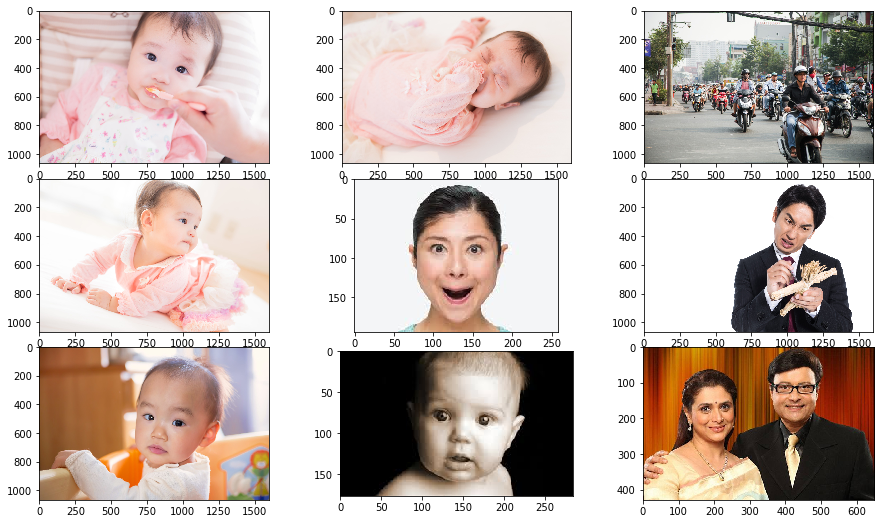

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# 表示窓のサイズ指定
fig_width = 15
fig_high = 9

target_filename = get_target_filename(target_path)


def imshow(target_filename, fig_width, fig_high):
  fig = plt.figure(figsize=(fig_width, fig_high))
  sub_fig = []
  for i in range(len(target_filename)):
    print(target_filename[i])
    sub_fig.append(fig.add_subplot(3, 3, i+1))

    img_bgr = cv2.imread(target_filename[i])
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    sub_fig[i].imshow(img_rgb)

  fig.subplots_adjust(wspace=0.3, hspace=0.1)
    
  plt.show()

imshow(target_filename, fig_width, fig_high)

In [59]:
! cp -r ./opencv/ ./gdrive/opencv/

cp: cannot create directory './gdrive/opencv/': Operation not supported


In [54]:
! mv --help

Usage: mv [OPTION]... [-T] SOURCE DEST
  or:  mv [OPTION]... SOURCE... DIRECTORY
  or:  mv [OPTION]... -t DIRECTORY SOURCE...
Rename SOURCE to DEST, or move SOURCE(s) to DIRECTORY.

Mandatory arguments to long options are mandatory for short options too.
      --backup[=CONTROL]       make a backup of each existing destination file
  -b                           like --backup but does not accept an argument
  -f, --force                  do not prompt before overwriting
  -i, --interactive            prompt before overwrite
  -n, --no-clobber             do not overwrite an existing file
If you specify more than one of -i, -f, -n, only the final one takes effect.
      --strip-trailing-slashes  remove any trailing slashes from each SOURCE
                                 argument
  -S, --suffix=SUFFIX          override the usual backup suffix
  -t, --target-directory=DIRECTORY  move all SOURCE arguments into DIRECTORY
  -T, --no-target-directory    treat DEST as a normal file
  -u, --u

##物体検出/顔

In [16]:
import cv2
import sys

sample_img = "/content/gdrive/My Drive/Colab Notebooks/img/human_face/babyFTHG7523_TP_V.jpg"
# "/content/gdrive/My Drive/Colab Notebooks/img/human_face/babyFTHG7523_TP_V.jpg"
cascade_file = "/content/opencv/data/haarcascades/haarcascade_frontalface_alt2.xml"

print(os.path.isfile(cascade_file))

image = cv2.imread(sample_img)
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cascade = cv2.CascadeClassifier(cascade_file)
print(image_gs)

face_list = cascade.detectMultiScale(
    image_gs, 
    scaleFactor=1.1,
    minNeighbors=3,
    minSize=(100, 100))

print(face_list)
if len(face_list) > 0:
  print(face_list)
  color = (0, 0, 255)
  for face in face_list:
    # x,y,w,h = face_list
    cv2.rectangle(image, tuple(face[0:2]),tuple(face[0:2]+face[2:4]), color, thickness=8)
  cv2.imwrite('./facedetect_output_10.png', image)
else:
  print("no face")

True
[[196 196 196 ... 238 238 238]
 [196 196 196 ... 238 238 238]
 [196 196 196 ... 238 238 238]
 ...
 [221 221 222 ... 237 237 237]
 [221 221 220 ... 237 237 237]
 [221 221 220 ... 237 237 237]]
()
no face


In [104]:
!ls

facedetect_output_2.png  facedetect_output.png	opencv
facedetect_output_3.png  gdrive			sample_data


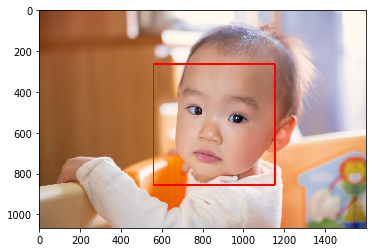

In [13]:
import cv2
import sys

# imshow('./facedetect_output.png',fig_width, fig_high)
img = cv2.imread('./facedetect_output_9.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()



*   顔検出
 * 赤ちゃんの顔が検出難しい
   * 顔の凹凸が大人と比べて少ないため
     * 試したこと
     * カスケードファイルを何種類か変えてみた
     * 検出領域のminの幅を変えてみた
     * 色調や顔立ちの異なる画像をでためしてみた
   * 色調の濃い画像だったら検出できた  
   →グレイスケールで凹凸を強調したり,輪郭をはっきりさせてみる 

*   課題
 *  顔認識のそもそもの仕組みを見直す
 *  画像を加工してみる→効果的な加工法をピックアップして実装する



##物体検出/顔_torchvision

## マスク画像の作成
[サンプルブログ](https://www.pynote.info/entry/opencv-image-composing-by-mask)